## Steady-state superradiance, lasing and cooperative resonance fluorescence

Notebook author: Nathan Shammah (nathan.shammah at gmail.com)


We consider a system of $N$ two-level systems (TLSs) with identical frequency $\omega_{0}$, incoherently pumped at a rate $\gamma_\text{P}$ and de-excitating at a collective emission rate $\gamma_\text{CE}$,

\begin{eqnarray}
\dot{\rho} &=&-i\lbrack \omega_{0}J_z,\rho \rbrack
+\frac{\gamma_\text {CE}}{2}\mathcal{L}_{J_{-}}[\rho]
+\frac{\gamma_\text{P}}{2}\sum_{n=1}^{N}\mathcal{L}_{J_{+,n}}[\rho]
\end{eqnarray}
This system can sustain superradiant light emission and line narrowing [1-3],  whose peak intensity scales proportionally to $N^2$.

It is then natural to ask the question of whether the system sustains a superradiant light emission steady state also when local losses are included, just like for the transient superfluorescent light emission [4]. We thus study also
\begin{eqnarray}
\dot{\rho} &=&-i\lbrack \omega_{0}J_z,\rho \rbrack
+\frac{\gamma_\text {CE}}{2}\mathcal{L}_{J_{-}}[\rho]
+\sum_{n=1}^{N}\left(\frac{\gamma_\text{P}}{2}\mathcal{L}_{J_{+,n}}[\rho]+
\frac{\gamma_\text{E}}{2}\mathcal{L}_{J_{-,n}}[\rho]\right)
\end{eqnarray}
and apply the detailed balance condition to the local emission and pumping rates. This study has relevance to the application of superradiance in light-harvesting devices. 

We will also assess the possibility of coherently driving the system $\propto J_x$ in the Hamiltonian, which leads to cooperative resonance fluorescence. 

See Refs. [1-12] for more information. Simulations performed with QuTiP [13] and PIQS [8], imported as $\texttt{qutip.piqs}$. 

In [1]:
import matplotlib.pyplot as plt
from qutip import *
from qutip.piqs import *
import numpy as np
from scipy import constants

## 1) Time evolution

We study the system of Eq. (1) by using the $\texttt{qutip.piqs}$ module to build the Liouvillian of the system. Using QuTiP's $\texttt{mesolve}()$ we can calculate operators expectation values in time as well as higher order correlation functions. 

### System properties
We initialize an object of the $\texttt{Dicke}$ class using $\texttt{qutip.piqs}$. The attributes of this object are used to define the rates of the Liouvillian superoperator. The Hamiltonian is constructed using the $\texttt{jspin}$ functions in the Dicke basis. The collective and local dissipation rates are defined according to a list of keywords:

<table>
    <tr>
<td> Keyword</td>
<td> Rate  $\gamma_j$</td>
<td> Lindbladian $\mathcal{L}[\rho]$</td>
</tr>

<tr>
<td> $\texttt{emission}$ </td>
<td> $\gamma_\text{E}$</td>
<td> \begin{eqnarray}\mathcal{L}[\rho]&=&\sum_n^N \left(J_{-,n}\rho J_{+,n} - \frac{1}{2}J_{+,n}J_{-,n}\rho - \frac{1}{2}\rho J_{+,n}J_{-,n} \right)\end{eqnarray}</td>
</tr>

<tr>
<td> $\texttt{pumping}$ </td>
<td> $\gamma_\text{P}$</td>
<td> \begin{eqnarray}\mathcal{L}[\rho]&=&\sum_n^N \left(J_{+,n}\rho J_{-,n} - \frac{1}{2}J_{-,n}J_{+,n}\rho - \frac{1}{2}\rho J_{-,n}J_{+,n} \right)\end{eqnarray}</td>
</tr>

<tr>
<td> $\texttt{dephasing}$ </td>
<td> $\gamma_\text{D}$</td>
<td> \begin{eqnarray}\mathcal{L}[\rho]&=&\sum_n^N \left(J_{z,n}\rho J_{z,n} - \frac{1}{2}J_{z,n}J_{z,n}\rho - \frac{1}{2}\rho J_{z,n}J_{z,n} \right)\end{eqnarray}</td>
</tr>

<tr>
<td> $\texttt{collective}\_\texttt{emission}$ </td>
<td> $\gamma_\text{CE}$</td>
<td> \begin{eqnarray}\mathcal{L}[\rho]&=& J_{-}\rho J_{+} - \frac{1}{2}J_{+}J_{-}\rho - \frac{1}{2}\rho J_{+}J_{-} \end{eqnarray}</td>
</tr>

<tr>
<td> $\texttt{collective}\_\texttt{pumping}$ </td>
<td> $\gamma_\text{CP}$</td>
<td> \begin{eqnarray}\mathcal{L}[\rho]&=&  J_{+}\rho J_{-} - \frac{1}{2}J_{-}J_{+}\rho - \frac{1}{2}\rho J_{-}J_{+} \end{eqnarray}</td>
</tr>

<tr>
<td> $\texttt{collective}\_\texttt{dephasing}$ </td>
<td> $\gamma_\text{CD}$</td>
<td> \begin{eqnarray}\mathcal{L}[\rho]&=& J_{z}\rho J_{z} - \frac{1}{2}J_{z}^2\rho - \frac{1}{2}\rho J_{z}^2 \end{eqnarray}</td>
</tr>

</table>

Note that in the table above and in $\texttt{qutip.piqs}$ functions, the Lindbladian $\mathcal{L}[\rho]$ is written with a factor 1/2 with respect to $\mathcal{L}_{A}[\rho]$ reported in the LaTeX math equations, in order to have the Lindbladian and full Liouvillian matrix consistently defined by the rates $\gamma_\alpha$. 

In [2]:
N = 4
system = Dicke(N = N)
[jx, jy, jz] = jspin(N)
jp = jspin(N, "+")
jm = jspin(N, "-")

w0 = 1
h0 = w0 * jz
gCE = 1
gP = N * gCE
system.hamiltonian = h0
system.collective_emission = gCE
system.pumping = gP

In [3]:
%timeit(system.liouvillian())

1.23 ms ± 41.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Liouvillian and steady state $\rho_\text{ss}$

In [4]:
L = system.liouvillian()
rhoss = steadystate(L)
jpjm_ss = expect(jp*jm, rhoss)

### Time integration for $g^{(2)}(\tau)$ and $\langle J_{+}J_{-}\rangle (t)$

We define the $g^{(2)}(\tau)$ of the system as the two-time correlation function mapping the photonic degrees of freedom onto the TLS collective operators

#### $g^{(2)}(\tau) = \frac{\langle: J^\dagger(\tau) a^\dagger(0) a(\tau) a(0) :\rangle}{|\langle: a^\dagger(0) a(0) :\rangle|^2}= \frac{\langle: J_{+}(\tau) J_{+}(0) J_{-}(\tau) J_{-}(0) :\rangle}{|\langle J_{+}(0) J_{-}(0) \rangle|^2}\ \ \ \ \ \ (2)$.

We apply the Quantum Regression Theorem, which allows to calculate two-time correlation functions for two operators $A$ and $B$ from the Liouvillian $\mathcal{D}$ of the system,

$\langle A(t+\tau)B(t)\rangle = \text{Tr}[Ae^{\mathcal{D}\tau}[B\rho(t)]]=\text{Tr}[A\rho_B(\tau)]$

where we introduced $\rho_B(\tau)$. In the case of Eq. (2) $A = B = J_{+}J_{-}$.

In [5]:
# time evolution
nt = 1001
# superradiant delay time
td = np.log(N)/(N*gCE)
tmax = 5 * td
t = np.linspace(0, tmax, nt)

# we initialize the collective TLS state in the ground state, given in terms of a Dicke state
rho0 = dicke(N, N/2, -N/2)
# we can initialize the collective TLS state in the steady state
rho0 = steadystate(L)
rhoss = steadystate(L)
# We implement the "quantum regression theorem"
A = jp*jm
rhoB = jm*rhoss*jp

#g2(tau)
result1 = mesolve(L, rhoB, t, [], e_ops = [A], options = Options(store_states=False))
g2t = result1.expect[0]
#rho(t)
result2 = mesolve(L, rho0, t, [], e_ops = A, options = Options(store_states=True))
rhot = result2.states
jpjmt = result2.expect[0]
nphot_ss = expect(jp*jm, rhoss)

### Visualization

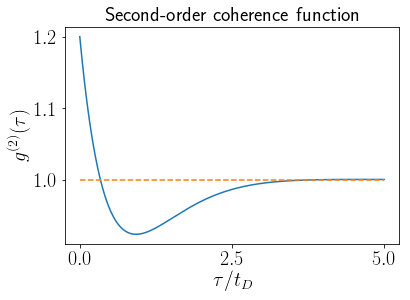

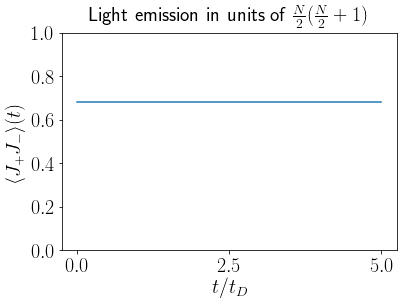

In [6]:
j2max = (0.5 * N + 1) * (0.5 * N)
label_size = 20
plt.rc('text', usetex = True)
plt.rc('xtick', labelsize=label_size) 
plt.rc('ytick', labelsize=label_size)

fig1 = plt.figure()
plt.plot(t/td, g2t/nphot_ss**2, '-')
plt.plot(t/td, 1+0*g2t, '--')
plt.xlabel(r'$\tau/t_\text{D}$', fontsize = label_size)
plt.ylabel(r'$g^{(2)}(\tau)$', fontsize = label_size)
plt.title(r'Second-order coherence function', fontsize = label_size)
plt.xticks([0,(tmax/2)/td,tmax/td])
plt.show()
plt.close()


fig1 = plt.figure()
plt.plot(t/td, jpjmt/j2max, '-')
plt.xlabel(r'$t/t_\text{D}$', fontsize = label_size)
plt.ylabel(r"$\langle J_{+}J_{-}\rangle (t)$", fontsize = label_size)
plt.xticks([0,(tmax/2)/td,tmax/td])
plt.ylim([0,1])
plt.rc('xtick', labelsize=label_size) 
plt.rc('ytick', labelsize=label_size)
plt.title(r"Light emission in units of $\frac{N}{2}(\frac{N}{2}+1)$", fontsize = label_size)
plt.show()
plt.close()

## 2) Maximum of light emission as a function of  $\frac{\gamma_\text{P}}{N\gamma_\text{CE}}$

We perform a study of the scaling of the steady state light emission of the system as a function of the pumping rate, normalized by the number of TLSs and the collective emission rate. The results show an optimal point for $\frac{\gamma_\text{P}}{N\gamma_\text{CE}}\simeq 1$ [4,5]. 

In [7]:
# Cycle on Coefficients
gCE = 1
gP0 = 1
gP_min_exp = -20
gP_max_exp = 20
gP_stepsize = 0.5
gP_list = np.arange(gP_min_exp, gP_max_exp+1, gP_stepsize)*0.1
gP_list_log = 10**(gP_list)

jpjmss_max_list = []
for i in gP_list_log:
    gP = i*gP0
    system = Dicke(hamiltonian = jz, N = N, pumping = gP, collective_emission = gCE)
    liouv = system.liouvillian()
    #steadystate
    rho_ss = steadystate(liouv)
    jpjm_ss = expect(jp*jm, rho_ss)
    jpjmss_max_list.append(jpjm_ss)

#### Visualization
We use the notation $\gamma_\uparrow=\gamma_\text{P}$ and $\gamma_\Downarrow=\gamma_\text{CE}$.

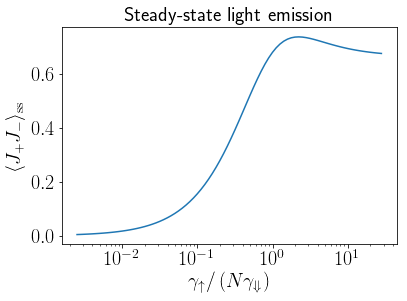

In [8]:
intensity_max = float(N)*gCE/2*(float(N)*gCE/2+1)
normalized_intensity = np.array(jpjmss_max_list)/intensity_max
plt.semilogx(gP_list_log/(gCE*N), normalized_intensity, '-')
label_size = 20
plt.rc('text', usetex = True)
plt.rc('xtick', labelsize=label_size) 
plt.rc('ytick', labelsize=label_size)
plt.xlabel(r'${\gamma_\uparrow}/\left({N\gamma_\Downarrow}\right)$', fontsize = label_size)
plt.ylabel(r'$\langle J_{+}J_{-}\rangle_\mathrm{ss}$', fontsize = label_size)
fname = 'figures/sssr_maxjpjm{}.pdf'.format(N)
plt.title(r'Steady-state light emission', fontsize = label_size)
plt.show()

plt.close()

### Emission spectrum

#### Single TLS case: Mollow triplet in the resonance fluorescence spectrum, no cooperative effects

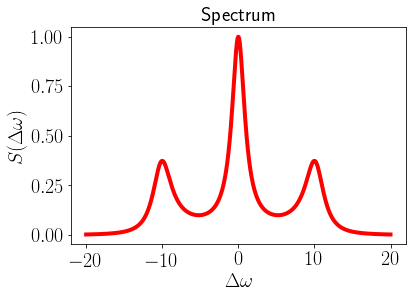

In [9]:
wz = 1
om = 5
gamm = 2
H = wz * sigmaz() + om * sigmax()
c_ops = [np.sqrt(gamm)*sigmam()]
a_op = sigmap()
b_op = sigmam()
wmin = - 20
wmax = 20
nw = 1000
wlist = np.linspace(wmin, wmax, nw)
liouv_TLS = liouvillian(H,c_ops)
sw = spectrum(liouv_TLS, wlist, [], a_op, b_op, solver="es", use_pinv=False)

smax = np.max(sw)
lw = 2
plt.plot(wlist, sw/smax, '-r', linewidth = 2*lw)
label_size = 20
plt.rc('text', usetex = True)
plt.rc('xtick', labelsize=label_size) 
plt.rc('ytick', labelsize=label_size)
plt.xlabel(r'$\Delta\omega$', fontsize = label_size)
plt.ylabel(r'$S(\Delta\omega)$', fontsize = label_size)
plt.title(r'Spectrum', fontsize = label_size)
plt.show()
plt.close()

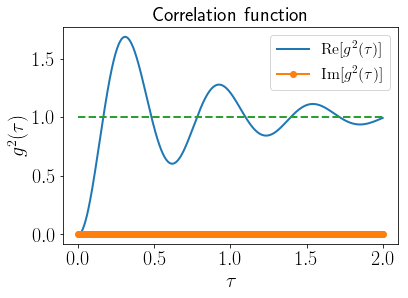

In [10]:
rhoss_TLS = steadystate(liouv_TLS)
B = sigmap() * sigmam()
jpjm_ss = expect(B, rhoss_TLS)
rhoB = sigmam() * rhoss_TLS * sigmap()
#Excited
t = np.linspace(0, 2, 1000)
options = Options(nsteps = 10000, atol = 1e-6)
result3 = mesolve(liouv_TLS, rhoB, t, [], e_ops = B, options = Options(store_states=True))
g2t = result3.expect[0]

taulist = t#np.linspace(0, 20, 100)
nphot_ss = expect(sigmap()*sigmam(), rhoss_TLS)
plt.plot(t, np.real(g2t)/nphot_ss**2, '-', linewidth = lw, label = r"$\mathrm{Re}[g^2(\tau)]$")
plt.plot(t, np.imag(g2t)/nphot_ss**2, '-o', linewidth = lw, label = r"$\mathrm{Im}[g^2(\tau)]$")
plt.plot(t, 1 +0*t , '--', linewidth = lw)
label_size = 20
plt.rc('text', usetex = True)
plt.rc('xtick', labelsize=label_size) 
plt.rc('ytick', labelsize=label_size)
plt.xlabel(r'$\tau$', fontsize = label_size)
plt.ylabel(r'$g^{2}(\tau)$', fontsize = label_size)
plt.title(r'Correlation function', fontsize = label_size)
plt.legend(fontsize = label_size*0.8)
plt.show()
plt.close() 

#### $N>1$: Steady-state superradiance, cooperative resonance fluorescence

Here we study the first-order and second-order correlation functions and the spectrum (using the quantum regression formula) of the coherently driven system of $N\gg1$ two-level systems that can also emit cooperatively [1]. 

In [11]:
N = 10
[jx, jy, jz] = jspin(N)
jp = jspin(N, "+")
jm = jp.dag()

w0 = 20
g = 0
h0 = w0 * jz + g * jx 
gCE = 1.0
gD = .0
gP = N/2 * gCE
n_therm = 1

gE_list = [0, gP*(1+n_therm)]
system = Dicke(N = N)
gE = 0

system.hamiltonian = h0
system.collective_emission = gCE
system.emission = gE
system.pumping = gP
system.dephasing = gD
L = system.liouvillian()
rhoss = steadystate(L)
print(system)
td = np.log(N)/(N*gCE)
tmax = 100 * td
t = np.linspace(0, tmax, 2000)
dw = 10
wmin = w0 - dw
wmax = w0 + dw
nw = 100
wlist = np.linspace(wmin, wmax, nw)
lw = 3
#1
g2_norm, G2 = coherence_function_g2(L, None, t, [], jm, solver="me", args={},
                          options=Options(ntraj=[20, 100]))

g1_norm, G1 = coherence_function_g1(L, None, t, [], jm, solver="me", args={},
                          options=Options(ntraj=[20, 100]))

print("ok")
#swss = spectrum(L, wlist, [], jp, jm)
wlist, swss = spectrum_correlation_fft(t, g1_norm)

print("ok 2")
#2
g2_ss = correlation_2op_1t(L, rhoss, t, [], jp, jm)
#3
rho0 = dicke(N, N/2, -N/2)
#g2(tau)
rhoB = jm*rhoss*jp
result1 = mesolve(L, rhoB, t, [], e_ops = [jp*jm], options = Options(store_states=True))
print("ok 3")
g2t = result1.expect[0]
result2 = mesolve(L, rho0, t, [], e_ops = jp*jm, options = Options(store_states=True))
print("ok 4")
rhot = result2.states
jpjmt = result2.expect[0]
#g2t nat
Bn = jp * jm
jpjm_ss = expect(Bn, rhoss)
rhoBn = Bn * rhoss


N = 10
Hilbert space dim = (36, 36)
Number of Dicke states = 36
Liouvillian space dim = (1296, 1296)
pumping = 5.0
collective_emission = 1.0
ok
ok 2
ok 3
ok 4


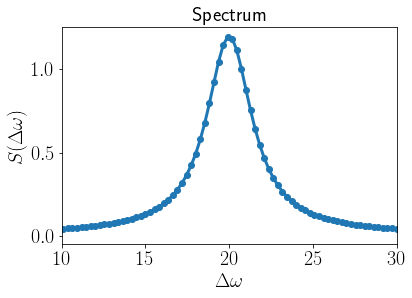

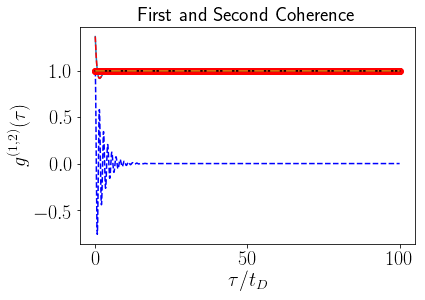

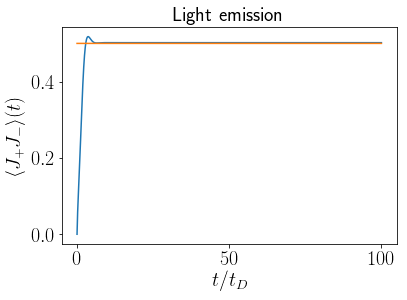

In [12]:
#1 Plot - Spectrum in frequency
plt.plot(wlist, swss, 'o-', linewidth = lw)
label_size = 20
plt.rc('text', usetex = True)
plt.rc('xtick', labelsize = label_size) 
plt.rc('ytick', labelsize = label_size)
plt.xlabel(r'$\Delta\omega$', fontsize = label_size)
plt.ylabel(r'$S(\Delta\omega)$', fontsize = label_size)
plt.title(r'Spectrum', fontsize = label_size)
plt.xlim([w0-10,w0+10])

plt.show()
plt.close()

#2 Plot 
j2max = (0.5 * N + 1) * (0.5 * N)

plt.rc('text', usetex = True)

fig1 = plt.figure()
plt.plot(t/td, np.real(g2t)/jpjm_ss**2, '-')
plt.plot(t/td, np.real(g2_norm), '--r')
plt.plot(t/td, np.real(g1_norm), '--b')
plt.plot(t/td, 1+np.imag(g2_norm), 'ro')
plt.plot(t/td, 1+np.imag(g2t), '-k')

plt.plot(t/td, 1+0*t, '-.')
plt.xlabel(r'$\tau/t_\text{D}$', fontsize = label_size)
plt.ylabel(r'$g^{(1,2)}(\tau)$', fontsize = label_size)
plt.title(r'First and Second Coherence', fontsize = label_size)
plt.xticks([0,(tmax/2)/td,tmax/td])
plt.rc('xtick', labelsize=label_size) 
plt.rc('ytick', labelsize=label_size)
plt.show()
plt.close()

#3 Plot Light emission as a function of time
fig1 = plt.figure()
plt.plot(t/td, jpjmt/j2max, '-')
plt.plot(t/td, 0*t+0.5, '-')
plt.xlabel(r'$t/t_\text{D}$', fontsize = label_size)
plt.ylabel(r'$\langle J_{+}J_{-}\rangle (t)$', fontsize = label_size)
plt.xticks([0,(tmax/2)/td,tmax/td])
plt.title(r'Light emission', fontsize = label_size)
plt.rc('xtick', labelsize=label_size) 
plt.rc('ytick', labelsize=label_size)
#plt.ylim([0,N])
plt.show()
plt.close()

In [13]:
## general formual for detailed balance (not used below, giving here a qualitative estimate)
# Bose-Einstein distribution determines the occupation number
frequency_hertz = 10**(13)
temperature_kelvin = 10**(6)
x = (frequency_hertz / temperature_kelvin) * (constants.hbar / constants.Boltzmann)
n0 = 1/(np.exp(x) -1)
print("occupation number, n0 = ",n0)

# set collective pumping and collective emission rates (coupled ensembles) 
g0 = 10
n0 = gP / g0 
gE = g0 * (1 + n0)
print(gE)
print(gP)

occupation number, n0 =  13091.5295848
15.0
5.0


### Steady-state superradiance under incoherent local pumping and collective and local losses

Below we study steady state superradiant light emission and lasing under incoherent local pumping. We introduce local losses to study the possibility of superradiant effects under thermal excitation (in the high-temperature limit).

In [14]:
# Do two nested cycles to calculate the dependency of the maximum superradiance peak on the pump rate

# compare the case of no loss (noloss) to the thermal case with detailed balance
#ntls list
ntls_list = np.linspace(10,40,4)
print(ntls_list)
#Coefficients
gCE = 1
gP0 = 1
gP_min_exp = -20
gP_max_exp = 20
gP_stepsize = 0.5
gP_list = np.arange(gP_min_exp, gP_max_exp+1, gP_stepsize)*0.1
gP_list_log = 10**(gP_list)
gP_gCE_N_list_log= 10**(gP_list)
max_nn_list = []
argmax_nn_list = []
normalized_intensity_list = []
max_nn_list_noloss = []
argmax_nn_list_noloss = []
normalized_intensity_list_noloss = []
lw_i = 0.5

[ 10.  20.  30.  40.]


In [15]:
# Do two nested cycles to calculate the dependency of the maximum superradiance peak on the pump rate
for nn in ntls_list:
    lw_i = lw_i + 0.5
    jpjm_max_list = []
    jpjm_max_arg_list = []
    jpjmss_max_list = []
    jpjm_max_list_noloss = []
    jpjm_max_arg_list_noloss = []
    jpjmss_max_list_noloss = []    
    N = int(nn)
    print(N)
    ntls = N
    jmax = (0.5 * N)
    j2max = (0.5 * N + 1) * (0.5 * N)
    intensity_max = float(N)*gCE/2*(float(N)*gCE/2+1)
    [jx, jy, jz] = jspin(N)
    jp = jspin(N, "+")
    jm = jp.dag()
    jpjm = jp*jm
    #time
    for i in gP_gCE_N_list_log:
        gP_gCE_N = i*gP0
        gP = gP_gCE_N*(gCE*N)
        gE = gP # fix the high temperature limit
        td0 = np.log(N)/(N*gCE)
        h = jz
        system = Dicke(hamiltonian = h, N = N, pumping = gP, 
                       collective_emission = gCE, emission = gE)
        system_noloss = Dicke(hamiltonian = h, N = N, pumping = gP, 
                              collective_emission = gCE, emission = 0.0*gE)
        liouv = system.liouvillian()
        liouv_noloss = system_noloss.liouvillian()
        #steadystate with loss
        rho_ss = steadystate(liouv)
        jpjm_ss = expect(jpjm, rho_ss)
        jpjmss_max_list.append(jpjm_ss)
        #steadystate no loss
        rho_ss_noloss = steadystate(liouv_noloss)
        jpjm_ss_noloss = expect(jpjm, rho_ss_noloss)
        jpjmss_max_list_noloss.append(jpjm_ss_noloss)
        #print("N=", N," gP/(N*gCE)=", gP/(N*gCE) )
    # emitted light with loss
    normalized_intensity = np.array(jpjmss_max_list)/intensity_max
    normalized_intensity_list.append(normalized_intensity) 
    argmax_nn = np.argmax(normalized_intensity)
    max_nn = np.max(normalized_intensity)
    max_nn_list.append(max_nn)
    argmax_nn_list.append(gP_list_log[argmax_nn])
    # emitted light no loss
    normalized_intensity_noloss = np.array(jpjmss_max_list_noloss)/intensity_max
    normalized_intensity_list_noloss.append(normalized_intensity_noloss) 
    argmax_nn_noloss = np.argmax(normalized_intensity_noloss)
    max_nn_noloss = np.max(normalized_intensity_noloss)
    max_nn_list_noloss.append(max_nn_noloss)
    argmax_nn_list_noloss.append(gP_list_log[argmax_nn_noloss])

10
20
30
40


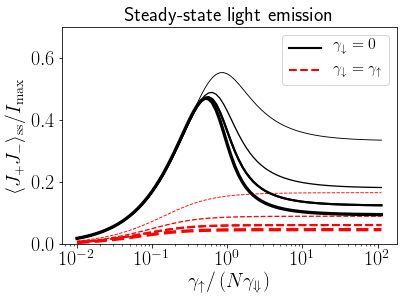

In [16]:
label_size = 20
label_size2 = 20
label_size3 = 20

plt.rc('text', usetex = True)
plt.rc('xtick', labelsize=label_size) 
plt.rc('ytick', labelsize=label_size)

fig1 = plt.figure(1)
lw_i = 0.9
for i in range(0,len(normalized_intensity_list)):
    
    #cycle for all N values
    
    lw_i = lw_i + 0.4*i
    plt.semilogx(gP_gCE_N_list_log, normalized_intensity_list_noloss[i], 'k-',
                 lw = lw_i)
    plt.semilogx(gP_gCE_N_list_log, normalized_intensity_list[i], 'r--', lw = lw_i)
    
    # have legend with mid-sized line
    
    if i == len(normalized_intensity_list) -2:
        
        plt.semilogx(gP_gCE_N_list_log, normalized_intensity_list_noloss[i], 'k-',
                 lw = lw_i, label=r"$\gamma_\downarrow=0$")
        plt.semilogx(gP_gCE_N_list_log, normalized_intensity_list[i], 'r--', lw = lw_i,
                 label=r"$\gamma_\downarrow=\gamma_\uparrow$")

plt.xlabel(r'${\gamma_\uparrow}/\left({N\gamma_\Downarrow}\right)$', fontsize = label_size3)
plt.ylabel(r'$\langle J_{+}J_{-}\rangle_\mathrm{ss}/I_\mathrm{max}$', fontsize = label_size3)
plt.ylim([0,0.7])
plt.legend(fontsize = label_size2*0.8)
plt.title(r'Steady-state light emission', fontsize = label_size2)
plt.show()
plt.close()

The plot above shows that there is a critical pumping rate when the system is pumped incoherently and dissipates only collectively (black solid curves), a result obtained in Ref. [4], D. Meiser and M.J. Holland, *Steady-state superradiance with alkaline-earth-metal atoms*, *Phys. Rev. A* **81**, 033847 (2010), and here reproduced using $\texttt{qutip.piqs}$. 

The plot also show the scaling with $N$ (thinner to thicker curves as $N$ grows from 10 to 40) [8]. 

The red dashed curves show that the critical pumping is not observed is if the system is allowed to dissipate also incoherently and locally, at a rate set by detailed balance. This condition is set in the most favourable case of high temperature, for which the effect of local losses should be less prominent with respect to the collectively enhanced losses. This condition is particularly relevant for superradiantly-enhanced quantum heat engines and toy models of quantum-enhanced bio-inspired light harvesting mechanisms [8]. 

#### References

[1] R. Bonifacio and L.A. Lugiato, Cooperative effects and bistability for resonance fluorescence, *Opt. Comm.* **19**, 172 (1976)

[2] F. Haake, M. I. Kolobov, C. Fabre, E. Giacobino, and S. Reynaud,  Superradiant laser, *Phys. Rev. Lett.* **71**, 995 (1993)

[3] F. Haake, M. I. Kolobov, C. Seeger, C. Fabre, E. Giacobino, and S. Reynaud, *Phys. Rev. A* **54**, 1625 (1996)

[4] D. Meiser and M.J. Holland, Steady-state superradiance with alkaline-earth-metal atoms, *Phys. Rev. A* **81**, 033847 (2010)

[5] D. Meiser and M.J. Holland, Intensity fluctuations in steady-state superradiance, *Phys. Rev. A* **81**, 063827 (2010)

[6] J.G. Bohnet *et al.*, A steady-state superradiant laser with less than one intracavity photon, *Nature* **484**, 78 (2012)

[7]  N. Shammah, N. Lambert, F. Nori, and S. De Liberato,  Superradiance with local phase-breaking effects, *Phys. Rev. A* **96**, 023863 (2017)

[8] N. Shammah, S. Ahmed, N. Lambert, S. De Liberato, and F. Nori, 
Open quantum systems with local and collective incoherent processes: Efficient numerical simulation using permutational invariance https://arxiv.org/abs/1805.05129

[9] M. A. Norcia, R. J. Lewis-Swan, J. R. Cline, B. Zhu, A. M. Rey, and J. K. Thompson, Cavity Mediated Collective Spin Exchange Interactions in a Strontium Superradiant Laser, arXiv:1711.03673 (2017)

[10] D. A. Tieri, M. Xu, D. Meiser, J. Cooper, and M. J. Holland, Theory of the crossover from lasing to steady state superradiance, arXiv:1702.04830 (2017)

[11] P. Kirton and J. Keeling, Superradiant and lasing states in driven-dissipative Dicke models, *New J. Phys.* **20**, 015009 (2018).

[12] P. Kirton, M. M. Roses, J. Keeling, and E. G. Dalla Torre, Introduction to the Dicke model: from equilibrium to nonequilibrium, and vice versa, arXiv:1805.09828 (2018)

[13] J.R. Johansson, P.D. Nation, and F. Nori, *Comp. Phys. Comm.* **183**, 1760 (2012) http://qutip.org


In [17]:
qutip.about()


QuTiP: Quantum Toolbox in Python
Copyright (c) 2011 and later.
A. J. Pitchford, P. D. Nation, R. J. Johansson, A. Grimsmo, and C. Granade

QuTiP Version:      4.3.0
Numpy Version:      1.13.3
Scipy Version:      1.0.0
Cython Version:     0.27.3
Matplotlib Version: 2.1.1
Python Version:     3.6.3
Number of CPUs:     2
BLAS Info:          INTEL MKL
OPENMP Installed:   False
INTEL MKL Ext:      True
Platform Info:      Darwin (x86_64)
Installation path:  /Users/nathanshammah/Downloads/Applications/lib/python3.6/site-packages/qutip
Please cite QuTiP in your publication.
For your convenience a bibtex file can be easily generated using `qutip.cite()`
